In [0]:
#Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Importing the data sets

In [39]:
dataset= pd.read_excel("Bangalore_Consolidated.xlsx", header=0, index_col=0)
print(dataset)

     Unnamed: 1  Precipitation  ...  Vapour Pressure  Wet Day Frequency
1901        Jan          5.751  ...           17.237             0.9999
1901        Feb         17.962  ...           17.045             1.2347
1901        Mar          1.671  ...           17.911             0.4648
1901        Apr         32.943  ...           21.781             1.9712
1901        May        152.546  ...           22.875             4.7063
...         ...            ...  ...              ...                ...
2002        Aug         40.268  ...           23.387             5.0300
2002        Sep         60.213  ...           24.917             4.7222
2002        Oct        183.967  ...           22.751             9.4179
2002        Nov         35.172  ...           20.605             3.4919
2002        Dec          4.541  ...           18.461             1.0509

[1224 rows x 12 columns]


In [158]:
print(dataset.iloc[:,0])

1901    Jan
1901    Feb
1901    Mar
1901    Apr
1901    May
       ... 
2002    Aug
2002    Sep
2002    Oct
2002    Nov
2002    Dec
Name: Unnamed: 1, Length: 1224, dtype: object


numpy.ndarray

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
values = dataset.values
values[:,0] = encoder.fit_transform(values[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
values = onehotencoder.fit_transform(values).toarray()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [61]:
#Splitting the data set into train and test set
print(values[:,:])

[[ 0.      0.      0.     ...  3.99   17.237   0.9999]
 [ 0.      0.      0.     ...  4.69   17.045   1.2347]
 [ 0.      0.      0.     ...  5.41   17.911   0.4648]
 ...
 [ 0.      0.      0.     ...  4.17   22.751   9.4179]
 [ 0.      0.      0.     ...  3.73   20.605   3.4919]
 [ 0.      0.      1.     ...  3.6    18.461   1.0509]]


In [124]:
dataset_train = values[:1000, :]

#dataset_train.astype('float32')
print(dataset_train)

[[ 0.      0.      0.     ...  3.99   17.237   0.9999]
 [ 0.      0.      0.     ...  4.69   17.045   1.2347]
 [ 0.      0.      0.     ...  5.41   17.911   0.4648]
 ...
 [ 0.      0.      0.     ...  4.61   17.991   1.3227]
 [ 0.      0.      0.     ...  5.41   19.256   2.7647]
 [ 1.      0.      0.     ...  5.81   21.781   3.1145]]


In [0]:
dataset_test = values[1000:, :]

In [126]:
print(dataset_test)

[[ 0.      0.      0.     ...  5.75   23.565   3.5322]
 [ 0.      0.      0.     ...  4.65   23.523   4.2019]
 [ 0.      0.      0.     ...  4.33   23.32    8.7236]
 ...
 [ 0.      0.      0.     ...  4.17   22.751   9.4179]
 [ 0.      0.      0.     ...  3.73   20.605   3.4919]
 [ 0.      0.      1.     ...  3.6    18.461   1.0509]]


In [224]:
dataset_train.shape

(1000, 23)

In [97]:
dataset_test.shape

(224, 23)

In [0]:
#Converting data frames into numpy arrays

In [0]:
training_set = dataset_train[:,:]

In [0]:
test_set = dataset_test[:, 0:1]

In [0]:
#Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler(feature_range=(0,1))

In [229]:
training_set[0,12]

5.751

In [0]:
rainfall_max = max(training_set[:,12])
rainfall_min = min(training_set[:,12])

In [0]:
training_set_scaled = sc.fit_transform(training_set)

In [0]:
#Creting a dataset with timesteps and features

In [0]:
X_train = []
y_train = []

for i in range(60, 999): 
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 12])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
#Reshaping the 2-D array to a 3-D array. 

In [0]:
y_train

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
#Building the RNN(LSTM)

In [0]:
#Importing the libraries for building the RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

In [0]:
#Building the RNN

In [0]:
# RNN- 4 LSTM Layers, each with a Dropout layer associated with it and a Dense Layer as the output layer.

In [285]:
X_train.shape[1]

60

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1) ) )
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50 ) )
regressor.add(Dropout(rate = 0.2))

regressor.add(Dense(units = 1))

In [0]:
#Compiling the RNN

In [0]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
#Fitting the data to the RNN Model

In [0]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [302]:
print(X_train.shape,y_train.shape)

(939, 60, 1) (939,)


In [328]:
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32) 

Epoch 1/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0164
Epoch 3/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0158
Epoch 4/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0161
Epoch 5/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0163
Epoch 6/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0159
Epoch 7/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0156
Epoch 8/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0159
Epoch 9/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0162
Epoch 10/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0161
Epoch 11/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0162
Epoch 12/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0162
Epoch 13/100
939/939 [==============================] - 5s 6ms/step - loss: 0.0165
Epoch 14/100

In [244]:
dataset.shape

(1224, 12)

In [304]:
#Creating the test set
print(dataset[len(values)-len(dataset_test)-60:].values)

[['May' 89.355 27.274 ... 5.64 23.312 4.4038]
 ['Jun' 167.944 25.094 ... 4.72 23.724 5.0754]
 ['Jul' 96.569 22.991 ... 4.26 23.032 5.633]
 ...
 ['Oct' 183.967 25.093 ... 4.17 22.751 9.4179]
 ['Nov' 35.172 23.67 ... 3.73 20.605 3.4919]
 ['Dec' 4.541 22.776 ... 3.6 18.461 1.0509]]


In [0]:
inputs = dataset[len(values)-len(dataset_test)-60:].values

In [306]:
inputs.shape

(284, 12)

In [0]:
#Reshaping the import

In [307]:
#inputs = inputs.reshape(-1,1)
encoder=LabelEncoder()
inputs[:,0] = encoder.fit_transform(inputs[:,0])
onehotencode = OneHotEncoder(categorical_features = [0])
inputs = onehotencode.fit_transform(inputs).toarray()
print(inputs)


[[ 0.      0.      0.     ...  5.64   23.312   4.4038]
 [ 0.      0.      0.     ...  4.72   23.724   5.0754]
 [ 0.      0.      0.     ...  4.26   23.032   5.633 ]
 ...
 [ 0.      0.      0.     ...  4.17   22.751   9.4179]
 [ 0.      0.      0.     ...  3.73   20.605   3.4919]
 [ 0.      0.      1.     ...  3.6    18.461   1.0509]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [262]:
#Feature transforming the inputs
print(inputs)

[[ 0.      0.      0.     ...  5.64   23.312   4.4038]
 [ 0.      0.      0.     ...  4.72   23.724   5.0754]
 [ 0.      0.      0.     ...  4.26   23.032   5.633 ]
 ...
 [ 0.      0.      0.     ...  4.17   22.751   9.4179]
 [ 0.      0.      0.     ...  3.73   20.605   3.4919]
 [ 0.      0.      1.     ...  3.6    18.461   1.0509]]


In [0]:
inputs= sc.transform(inputs)

In [0]:
#Creating the 2D data frame of previous 60 timesteps. 

In [0]:
X_test = []
for i in range (60, 284):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

In [0]:
#Reshaping the dataset into a 3-D array for the RNN 

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
#Making predictions from the model.

In [0]:
predicted_rainfall =  regressor.predict(X_test)

In [0]:
#Inverse transforming the predicted valuess from the model

In [0]:
#predicted_rainfall = sc.inverse_transform(predicted_rainfall)

In [312]:
print(rainfall_max,rainfall_min)

360.945 0.0


In [330]:
predicted_rainfall

array([[0.34672588],
       [0.21291858],
       [0.2619265 ],
       [0.2670996 ],
       [0.3126263 ],
       [0.43918005],
       [0.22639905],
       [0.08377839],
       [0.03035225],
       [0.01496734],
       [0.03626734],
       [0.12084562],
       [0.34672588],
       [0.21291858],
       [0.2619265 ],
       [0.2670996 ],
       [0.3126263 ],
       [0.43918005],
       [0.22639905],
       [0.08377839],
       [0.03035225],
       [0.01496734],
       [0.03626734],
       [0.12084562],
       [0.34672588],
       [0.21291858],
       [0.2619265 ],
       [0.2670996 ],
       [0.3126263 ],
       [0.43918005],
       [0.22639905],
       [0.08377839],
       [0.03035225],
       [0.01496734],
       [0.03626734],
       [0.12084562],
       [0.34672588],
       [0.21291858],
       [0.2619265 ],
       [0.2670996 ],
       [0.3126263 ],
       [0.43918005],
       [0.22639905],
       [0.08377839],
       [0.03035225],
       [0.01496734],
       [0.03626734],
       [0.120

In [0]:
predicted_rainfall = predicted_rainfall*(rainfall_max-rainfall_min) + rainfall_min

In [332]:
predicted_rainfall.shape

(224, 1)

In [0]:
#Plotting the results- 

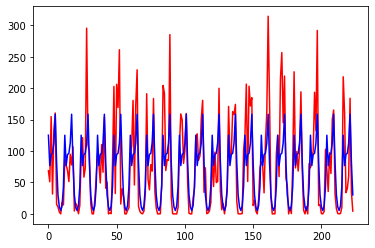

In [336]:
plt.plot(dataset_test[:,12], color = 'red', label = 'Real_rainfall')
plt.plot(predicted_rainfall[:], color = 'blue', label = 'predicted_rainfall')

In [0]:
#Caluculating the RMSE value

In [334]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(dataset_test[:,12], predicted_rainfall))

print(rmse)

47.939644802035254


In [183]:
predicted_rainfall.shape

(224, 1)

In [190]:
dataset_test.shape

(224, 23)

In [316]:
print(dataset_test[:,20])

[5.75 4.65 4.33 4.39 4.52 4.07 3.67 3.57 3.98 4.79 5.64 5.95 5.68 4.62
 4.32 4.39 4.57 4.05 3.63 3.58 3.87 4.67 5.61 6.01 5.71 4.67 4.42 4.38
 4.55 4.15 3.69 3.58 3.91 4.61 5.48 5.93 5.67 4.73 4.49 4.42 4.64 4.15
 3.75 3.56 3.9  4.83 5.68 5.86 5.66 4.74 4.37 4.37 4.48 4.14 3.71 3.54
 3.9  4.68 5.49 5.91 5.66 4.66 4.34 4.37 4.51 4.14 3.69 3.57 3.93 4.74
 5.64 5.99 5.5  4.65 4.36 4.37 4.57 4.1  3.71 3.55 4.04 4.75 5.7  5.89
 5.71 4.66 4.31 4.34 4.58 4.09 3.65 3.51 3.83 4.76 5.56 5.91 5.59 4.67
 4.38 4.38 4.53 4.11 3.72 3.46 3.91 4.68 5.57 5.93 5.7  4.73 4.38 4.41
 4.47 4.08 3.67 3.49 3.93 4.74 5.63 5.88 5.7  4.7  4.33 4.43 4.56 4.1
 3.63 3.46 3.93 4.77 5.56 5.92 5.52 4.79 4.38 4.44 4.53 4.1  3.81 3.55
 3.97 4.71 5.63 5.86 5.76 4.69 4.42 4.39 4.5  4.08 3.74 3.51 3.94 4.75
 5.56 5.75 5.69 4.85 4.44 4.42 4.6  4.17 3.8  3.63 4.03 4.86 5.75 6.01
 5.75 4.84 4.42 4.45 4.53 4.1  3.76 3.57 3.96 4.72 5.67 5.88 5.45 4.67
 4.4  4.43 4.6  4.14 3.72 3.54 3.99 4.78 5.55 5.91 5.6  4.62 4.37 4.38
 4.57 4

In [186]:
dataset_test

array([[ 0.    ,  0.    ,  0.    , ...,  5.75  , 23.565 ,  3.5322],
       [ 0.    ,  0.    ,  0.    , ...,  4.65  , 23.523 ,  4.2019],
       [ 0.    ,  0.    ,  0.    , ...,  4.33  , 23.32  ,  8.7236],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  4.17  , 22.751 ,  9.4179],
       [ 0.    ,  0.    ,  0.    , ...,  3.73  , 20.605 ,  3.4919],
       [ 0.    ,  0.    ,  1.    , ...,  3.6   , 18.461 ,  1.0509]])

In [0]:
#saving the predicted values and real values

In [0]:
np.savetxt('predicted_rainfall.csv',predicted_rainfall , delimiter= ',')

In [0]:
np.savetxt('actual_rainfall.csv', dataset_test, delimiter= ',')